[!CAUTION] Important:

Update the requirement.txt or install:
- [ ] pip install panel holoviews hvplot
- [ ] pip install scikit-image

In [2]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import typing
import requests
import time
import shutil
import json
from starvers.starvers import TripleStoreEngine
import seaborn as sns
from scipy.io import arff
import json
from rdflib import Graph, Namespace, URIRef, Literal, BNode
from rdflib.namespace import RDF, RDFS, XSD, DCTERMS
from sklearn.preprocessing import MinMaxScaler
import sys
sys.path.append("/Users/matthiasfrenzl/Documents/GitHub/sos3")
sys.path.append("/Users/matthiasfrenzl/Documents/GitHub/sos3/SOMToolbox")
from SOMToolbox.somtoolbox import SOMToolbox
from SOMToolbox import minisom as som
from SOMToolbox.SOMToolBox_Parse import SOMToolBox_Parse

try:
    from SOMToolbox import minisom as som_module
    from SOMToolbox.SOMToolBox_Parse import SOMToolBox_Parse
    from SOMToolbox.somtoolbox import SOMToolbox
except ImportError:
    try:
        import minisom as som_module
        import SOMToolBox_Parse
        import somtoolbox as SOMToolbox
    except ImportError as e:
        print(f"Error importing SOM modules: {e}")
        print("Please ensure minisom.py, SOMtoolbox_Parse.py, and somtoolbox.py are in the path.")

print("Modules imported successfully.")


Modules imported successfully.


# Task Create a machine-actionable description of the dataset 
- [ ] following Croissant / Schema.org descriptions for datasets 
  - [ ] Croissant: https://neurips.cc/virtual/2024/poster/97627, https://docs.mlcommons.org/croissant/docs/croissant-spec.html; 
  - [ ] schema.org: https://schema.org/Dataset, 
  - [ ] Example:
  - [ ] JSON example provided at https://schema.org/Dataset#eg-0478)
  
Note: Task already done, as we have a dataset that is already in the right format.

In [3]:
# Filling the Data Frame

dataset_path = "" # File has to be in the same directory as the notebook
file_name = 'php0FyS2T.arff' # Filename in .arff format 

def load_arff_data() -> pd.DataFrame:
    
    input_file = os.path.join(dataset_path, file_name) 
    
    # Use scipy's arff loader to handle the @attribute metadata and @data sections
    raw_data, meta = arff.loadarff(input_file)
    
    # Convert the raw structured array to a pandas DataFrame
    dataframe = pd.DataFrame(raw_data)

    def clean_data(df: pd.DataFrame):
        # ARFF loaders often read nominal/string attributes as bytes (e.g., b'1').
        # This function decodes them back to standard strings or integers.
        if 'Class' in df.columns and df['Class'].dtype == object: # Convert original string values (in case they were wrongly importated as "byte") back to to string or integer
             df['Class'] = df['Class'].str.decode('utf-8').astype(int)
        return df

    loaded_data = dataframe
    loaded_data = clean_data(loaded_data)
    
    return loaded_data

# Execute
df = load_arff_data()

display(df.head())



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V56,V57,V58,V59,V60,V61,V62,V63,V64,Class
0,0.000579,0.000609,0.000551,0.000554,0.000603,0.000614,0.000611,0.000611,0.000611,0.000594,...,0.000533,0.000555,0.000565,0.000581,0.000597,0.000625,0.000624,0.000617,0.000614,13
1,0.000630,0.000661,0.000719,0.000651,0.000643,0.000640,0.000646,0.000624,0.000584,0.000546,...,0.000520,0.000533,0.000564,0.000596,0.000623,0.000642,0.000661,0.000671,0.000667,13
2,0.000616,0.000615,0.000606,0.000568,0.000558,0.000552,0.000551,0.000552,0.000531,0.000530,...,0.000590,0.000589,0.000566,0.000575,0.000618,0.000543,0.000592,0.000607,0.000602,13
3,0.000613,0.000569,0.000564,0.000607,0.000643,0.000647,0.000663,0.000658,0.000635,0.000600,...,0.000536,0.000549,0.000542,0.000566,0.000592,0.000601,0.000609,0.000614,0.000603,13
4,0.000599,0.000552,0.000558,0.000569,0.000616,0.000639,0.000631,0.000634,0.000639,0.000596,...,0.000543,0.000557,0.000562,0.000558,0.000591,0.000608,0.000613,0.000610,0.000594,13


# Task: Analyze and describe the characteristics of the dataset

- [ ] Analyze and describe the characteristics of the dataset 
  - [ ] size, 
  - [ ] attribute types as discussed in class, 
  - [ ] value ranges, 
  - [ ] sparsity, 
  - [ ] min/max values, 
  - [ ] outliers, 
  - [ ] missing values, 
  - [ ] correlations, ...
- [ ] **Provenance Graph:** Describe aa this in the provenance graph. 
- [ ] **RDF:** Also, describe any hypotheses you might have concerning the 
  - [ ] distribution of the data, 
  - [ ] number of clusters and their relationship, 
  - [ ] majority/minority classes as rdf comment field in the provenance graph.

=== Dataset Overview ===
Number of instances: 1600
Number of attributes: 65

=== Attribute Types ===
float64    64
int64       1
Name: count, dtype: int64

=== Missing Values ===
Total missing values: 0

=== Value Ranges & Statistics ===


,min,max,mean,std,range
V1,0.000168,0.002390,0.000737,0.000270,0.002222
V2,0.000182,0.002247,0.000715,0.000265,0.002065
V3,0.000148,0.002112,0.000690,0.000258,0.001964
V4,0.000104,0.001998,0.000667,0.000252,0.001894
V5,0.000120,0.002151,0.000646,0.000250,0.002031



=== Sparsity ===
Sparsity (percentage of zeros): 0.00%

=== Class Distribution (Majority/Minority) ===
Number of classes: 100
Min class size: 16
Max class size: 16


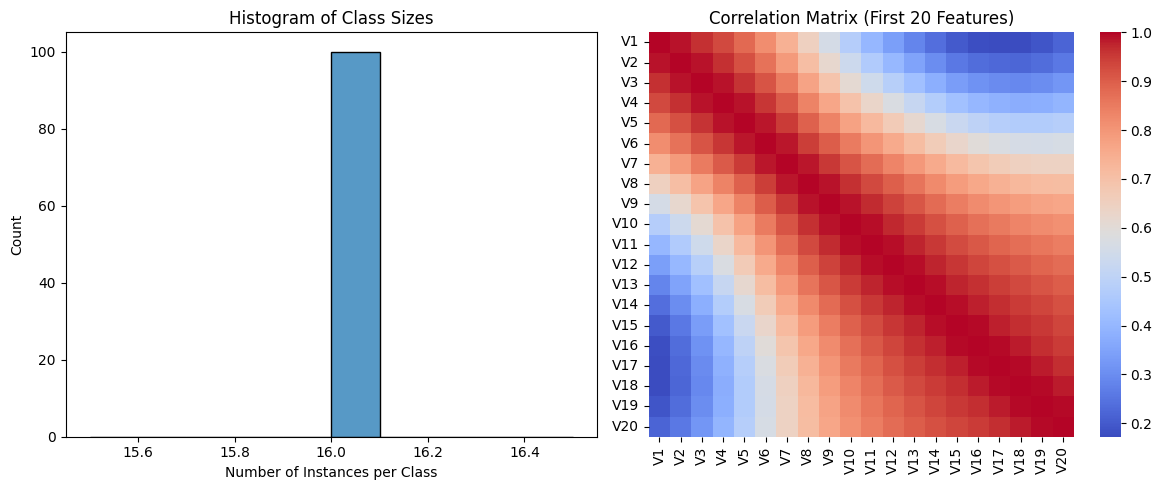

In [4]:
# Data Analysis

def analyze_dataset(df: pd.DataFrame):
    print("=== Dataset Overview ===")
    n_instances, n_attributes = df.shape
    print(f"Number of instances: {n_instances}")
    print(f"Number of attributes: {n_attributes}")
    
    # Check for Class attribute
    if 'Class' not in df.columns:
        target_col = df.columns[-1]  # Sometimes the target is the last column with a different name
        print(f"Target column assumed to be: '{target_col}'")
    else:
        target_col = 'Class'
        
    print(f"\n=== Attribute Types ===")
    print(df.dtypes.value_counts())
    
    print("\n=== Missing Values ===")
    missing_counts = df.isnull().sum()
    total_missing = missing_counts.sum()
    print(f"Total missing values: {total_missing}")
    if total_missing > 0:
        print(missing_counts[missing_counts > 0])
        
    print("\n=== Value Ranges & Statistics ===")
    # numeric_df excludes the target if it's categorical
    numeric_df = df.select_dtypes(include=[np.number])
    stats = numeric_df.describe().T
    stats['range'] = stats['max'] - stats['min']
    display(stats[['min', 'max', 'mean', 'std', 'range']].head())

    print("\n=== Sparsity ===")
    zero_counts = (numeric_df == 0).sum().sum()
    total_cells = numeric_df.size
    sparsity = zero_counts / total_cells
    print(f"Sparsity (percentage of zeros): {sparsity:.2%}")

    print("\n=== Class Distribution (Majority/Minority) ===")
    class_counts = df[target_col].value_counts()
    print(f"Number of classes: {len(class_counts)}")
    print(f"Min class size: {class_counts.min()}")
    print(f"Max class size: {class_counts.max()}")
    
    # Plotting
    plt.figure(figsize=(12, 5))
    
    # 1. Class Distribution
    plt.subplot(1, 2, 1)
    # Using a subset if too many classes
    if len(class_counts) > 20:
        sns.histplot(class_counts, bins=10, kde=False)
        plt.title('Histogram of Class Sizes')
        plt.xlabel('Number of Instances per Class')
    else:
        sns.barplot(x=class_counts.index, y=class_counts.values)
        plt.title('Class Distribution')
        
    # 2. Correlation Matrix (features only)
    plt.subplot(1, 2, 2)
    # Subsampling features if too many for a clean plot
    corr_matrix = numeric_df.iloc[:, :20].corr() 
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
    plt.title('Correlation Matrix (First 20 Features)')
    
    plt.tight_layout()
    plt.show()

    return stats, class_counts

# Execute Analysis
stats, class_counts = analyze_dataset(df)



# Task 1
1) Train a reasonably sized „regular“ SOM 
- Train a SOM with „regular“ size (i.e. number of units as a certain fraction of the number of data items) and reasonable training parameters (sufficiently large initial neighborhood, learning rate; provide a justification for the selection of the parameters. 
- NOTE: Learning rates for SOMs differ from those usually encountered in Deep Neural Networks, c.f. lecture)
- Analyse in detail the class distribution, cluster structure, quantization errors, topology violations. 
    - a) Can you identify the border effect and magnification factors. 
    - b) How well do class distribution and cluster structure match? 
    - c) Which classes fall into sub-clusters, which classes are split across clusters, which classes mix in clusters. 
    - d) How is the quantization error distributed on the map, how does this correspond with perceived cluster separation and quality?
- Describe and compare the structures found (providing detailed info on visualizations and parameters)

In [ ]:
# Task 1 

# Task 1 Functions

from collections import Counter, defaultdict
from typing import Dict, Tuple

def train_som(
    X: np.ndarray,
    map_x: int,
    map_y: int,
    *,
    sigma: float,
    learning_rate: float,
    iterations: int,
    random_seed: int = 42,
    use_pca_init: bool = True,
    verbose: bool = True
):
    """
    Trains a SOM using MiniSom loaded from the attached minisom.py.
    """
    som_net = som_module.MiniSom(
        x=map_x,
        y=map_y,
        input_len=X.shape[1],
        sigma=sigma,
        learning_rate=learning_rate,
        neighborhood_function="gaussian",
        random_seed=random_seed,
    )

    if use_pca_init and hasattr(som_net, "pca_weights_init"):
        som_net.pca_weights_init(X)
    else:
        som_net.random_weights_init(X)

    som_net.train_random(X, iterations, verbose=verbose)
    return som_net


def qe_map_and_hits(som_net, X: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Returns:
      qe_map: mean ||x - w_BMU|| per neuron (NaN if neuron has no hits)
      hits:   activation counts per neuron
    """
    W = som_net.get_weights()
    mx, my, _ = W.shape

    hits = som_net.activation_response(X)
    qe_sum = np.zeros((mx, my), dtype=float)

    for x in X:
        w = som_net.winner(x)
        qe_sum[w] += np.linalg.norm(x - W[w])

    qe_map = np.divide(qe_sum, hits, out=np.full_like(qe_sum, np.nan), where=hits > 0)
    return qe_map, hits


def neuron_class_counters(som_net, X: np.ndarray, y: np.ndarray) -> Dict[Tuple[int, int], Counter]:
    """
    Uses labels_map() if available in your minisom.py.
    """
    if not hasattr(som_net, "labels_map"):
        raise AttributeError("Your SOM class does not implement labels_map().")
    return som_net.labels_map(X, y)


def class_spread_map(som_net, X: np.ndarray, y: np.ndarray) -> Dict[int, set]:
    """
    Returns: class -> set of neurons (BMUs) used by that class.
    """
    spread = defaultdict(set)
    for xi, ci in zip(X, y):
        spread[int(ci)].add(som_net.winner(xi))
    return spread


def export_somtoolbox_weights(som_net, filepath: str) -> None:
    """
    Writes SOM weights in a minimal SOMToolbox-like ASCII format.
    """
    W = som_net.get_weights()
    mx, my, dim = W.shape

    with open(filepath, "w", encoding="utf-8") as f:
        f.write(f"$XDIM {mx}\n")
        f.write(f"$YDIM {my}\n")
        f.write(f"$VEC_DIM {dim}\n")
        for i in range(mx):
            for j in range(my):
                f.write(" ".join(map(str, W[i, j].tolist())) + "\n")


def parse_somtoolbox_weights(filepath: str) -> np.ndarray:
    """
    Reads a SOMToolbox-style weight file using the attached SOMToolBox_Parse.py.
    """
    # Ensure class is available
    parser = SOMToolBox_Parse(filepath)
    meta = parser.read_weight_file()
    return meta["arr"].reshape(meta["xdim"], meta["ydim"], meta["vec_dim"])


# Task: Preprocessing
- [ ] Get the data into the form needed for training SOMs. 
- [ ] Describe your preprocessing steps 
  - [ ] (e.g. transcoding, scaling), 
  - [ ] why you did it and how you did it. 
  - [ ] Specifically, if your dataset turns out to be extremely large (very high-dimensional and huge number of vectors so that it does not fit into memory for training SOMs) you may choose to apply subsampling for the training data.


In [6]:
# Prepare Data ---

if not df.empty:
    target_col = "Class"
    X = df.drop(columns=[target_col]).to_numpy(dtype=float)
    y = df[target_col].to_numpy()

    # Ensure integer class labels
    try:
        y = y.astype(int)
    except Exception:
        pass

    # Scaling (essential for SOM)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    print("X_scaled shape:", X_scaled.shape)
    print("y shape:", y.shape, "unique classes:", len(np.unique(y)))
else:
    print("Dataframe is empty.")

X_scaled shape: (1600, 64)
y shape: (1600,) unique classes: 100


In [7]:
# --- 3. Train SOM (Task 1) using MiniSom ---

if not df.empty:
    N = X_scaled.shape[0]
    heuristic_units = int(np.round(5 * np.sqrt(N)))  # Kohonen/Vesanto rule-of-thumb
    map_size = int(np.ceil(np.sqrt(heuristic_units)))  # square map close to rule

    input_dim = X_scaled.shape[1]

    # Training hyperparameters (SOM-typical)
    sigma = map_size / 2.0        # large initial neighborhood for global ordering
    lr = 0.5                      # SOM lr is typically ~0.1..0.7 in early phase
    epochs = 5
    iterations = epochs * N

    print(f"Heuristic units ~ 5*sqrt(N) = {heuristic_units}")
    print(f"Chosen map_size = {map_size}x{map_size} = {map_size*map_size} units ({(map_size*map_size)/N:.2%} of N)")
    print(f"Training SOM {map_size}x{map_size} for {iterations} iterations (epochs={epochs})...")

    # Use 'som_net' instead of 'som' to keep the module 'som' available for other cells
    som_net = train_som(
        X_scaled,
        map_x=map_size,
        map_y=map_size,
        sigma=sigma,
        learning_rate=lr,
        iterations=iterations,
        random_seed=42,
        use_pca_init=True,
        verbose=True,
    )



Heuristic units ~ 5*sqrt(N) = 200
Chosen map_size = 15x15 = 225 units (14.06% of N)
Training SOM 15x15 for 8000 iterations (epochs=5)...
 [ 8000 / 8000 ] 100% - 0:00:00 left 
 quantization error: 0.3225809954694314


In [8]:
# --- 4. Analyze (Task 1) using MiniSom metrics ---

if 'som_net' in locals():
    qe = som_net.quantization_error(X_scaled)
    te = som_net.topographic_error(X_scaled)

    print(f"Quantization Error (QE): {qe:.4f}")
    print(f"Topographic Error  (TE): {te:.4f}")



Quantization Error (QE): 0.3226
Topographic Error  (TE): 0.0037


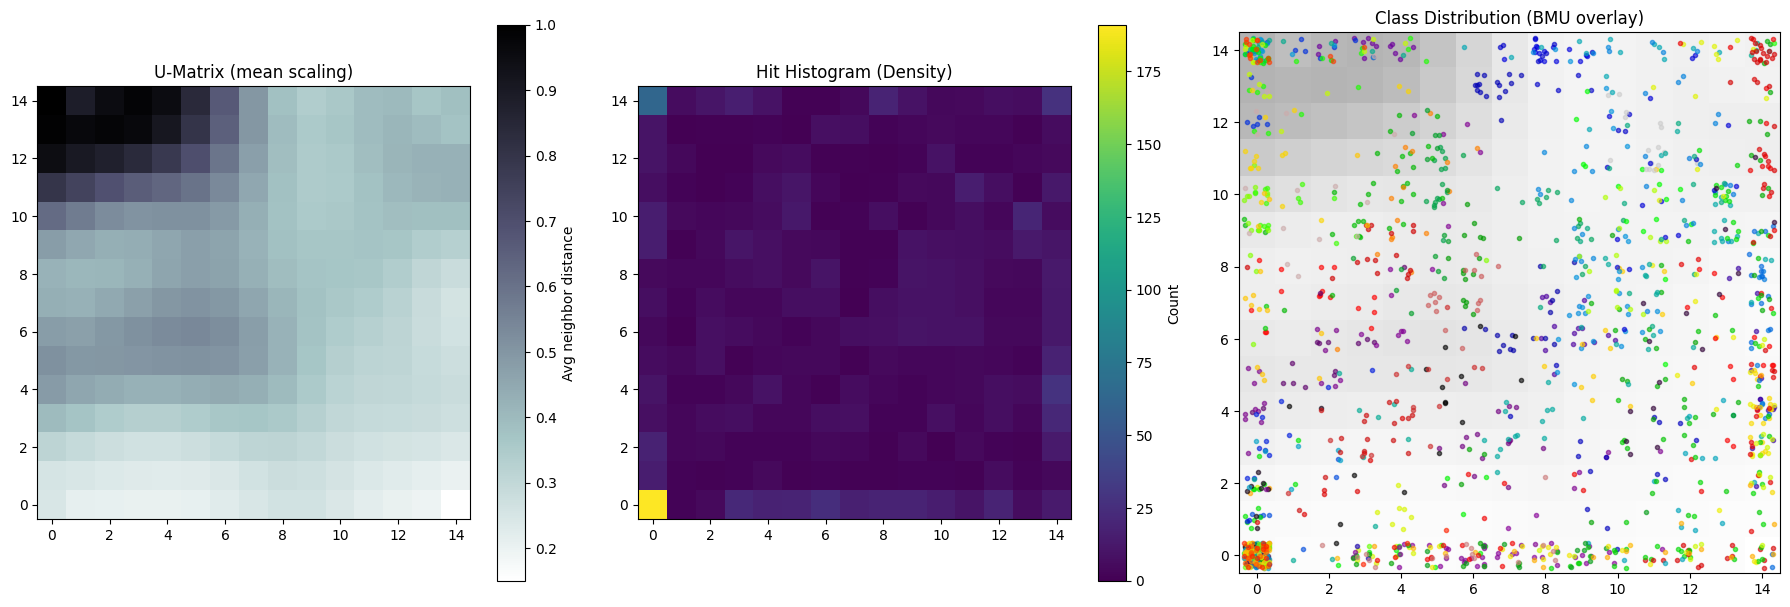

Neurons: Empty=10, Pure=40, Mixed=175
Classes: Coherent (1 neuron)=5, Split (>1 neuron)=95
Exported SOMToolbox weights to: som_task1_15x15.wgt
Parsed weights shape: (15, 15, 64) match: True


In [9]:
# --- 5. Visualization + basic class/cluster diagnostics (Task 1) ---

if 'som_net' in locals():
    plt.figure(figsize=(18, 6))

    # U-Matrix (cluster borders)
    u_matrix = som_net.distance_map(scaling="mean")  # mean reduces border bias vs "sum"
    plt.subplot(1, 3, 1)
    plt.title("U-Matrix (mean scaling)")
    plt.imshow(u_matrix.T, origin="lower", cmap="bone_r")
    plt.colorbar(label="Avg neighbor distance")

    # Hit Histogram (density / magnification)
    hits = som_net.activation_response(X_scaled)
    plt.subplot(1, 3, 2)
    plt.title("Hit Histogram (Density)")
    plt.imshow(hits.T, origin="lower", cmap="viridis")
    plt.colorbar(label="Count")

    # Class Distribution overlay
    plt.subplot(1, 3, 3)
    plt.title("Class Distribution (BMU overlay)")
    plt.imshow(u_matrix.T, origin="lower", cmap="Greys", alpha=0.3)

    n_classes = len(np.unique(y))
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, max(n_classes, 2)))

    # Subsample for plotting if dataset is large
    plot_indices = np.arange(len(X_scaled))
    if len(plot_indices) > 5000:
        np.random.shuffle(plot_indices)
        plot_indices = plot_indices[:5000]

    for i in plot_indices:
        x = X_scaled[i]
        w = som_net.winner(x)
        jitter = np.random.rand(2) * 0.7 - 0.35
        cls = int(y[i]) - 1  # dataset classes typically 1..K
        cls = max(0, min(cls, len(colors) - 1))
        plt.plot(
            w[0] + jitter[0],
            w[1] + jitter[1],
            marker="o",
            markersize=3,
            color=colors[cls],
            alpha=0.6,
        )

    plt.xlim(-0.5, map_size - 0.5)
    plt.ylim(-0.5, map_size - 0.5)
    plt.tight_layout()
    plt.show()

    # --- Mixed/pure/empty neurons using minisom.labels_map() ---
    label_counters = neuron_class_counters(som_net, X_scaled, y)

    empty_count = map_size * map_size - len(label_counters)
    pure_count = sum(1 for c in label_counters.values() if len(c) == 1)
    mixed_count = sum(1 for c in label_counters.values() if len(c) > 1)

    print(f"Neurons: Empty={empty_count}, Pure={pure_count}, Mixed={mixed_count}")

    # --- Class splitting (simple fragmentation: how many neurons per class?) ---
    spread = class_spread_map(som_net, X_scaled, y)
    coherent_classes = sum(1 for nodes in spread.values() if len(nodes) == 1)
    split_classes = sum(1 for nodes in spread.values() if len(nodes) > 1)
    print(f"Classes: Coherent (1 neuron)={coherent_classes}, Split (>1 neuron)={split_classes}")

    # --- Optional: export weights in SOMToolbox-style + parse back using SOMToolBox_Parse ---
    wgt_path = f"som_task1_{map_size}x{map_size}.wgt"
    export_somtoolbox_weights(som_net, wgt_path)
    try:
        W_parsed = parse_somtoolbox_weights(wgt_path)
        print(f"Exported SOMToolbox weights to: {wgt_path}")
        print("Parsed weights shape:", W_parsed.shape, "match:", np.allclose(W_parsed, som_net.get_weights()))
    except Exception as e:
        print(f"Export check failed: {e}")

# Task 2 Analyze different initializations of the SOM:

- [ ] Train one further „regular-sized“ SOM using the same training parameters as above, but using a different random seed for initializing the SOM
- [ ] Show and describe 
  - [ ] a) how the cluster structures and class distributions shift on the two SOMs, 
  - [ ] b) the effect on topology violations, cluster relationships, etc. 
  - [ ] c) Which clusters show a stable relationship, which ones change their relative position? 
  - [ ] d) Which data instances are stably mapped with similar data instances, which change a lot? Are they part of the same clusters?
- [ ] Describe and compare the structures found (providing detailed info on visualizations and parameters)

In [10]:
# Task 2 — Stability across random seeds (MiniSom)

print("Training SOM 2 (Seed 999) for comparison...")

# Use train_som (defined in Cell 4)
som2 = train_som(
    X_scaled,
    map_x=map_size,
    map_y=map_size,
    sigma=sigma,
    learning_rate=lr,
    iterations=iterations,
    random_seed=999,
    use_pca_init=True,   # deterministic init; seed mainly affects training order
    verbose=False,
)

qe1 = som_net.quantization_error(X_scaled)
te1 = som_net.topographic_error(X_scaled)

qe2 = som2.quantization_error(X_scaled)
te2 = som2.topographic_error(X_scaled)

print("\n=== Comparative Metrics ===")
print(f"SOM 1 (Seed 42)  | QE: {qe1:.4f} | TE: {te1:.4f}")
print(f"SOM 2 (Seed 999) | QE: {qe2:.4f} | TE: {te2:.4f}")

# Centroid (mean BMU position) per class
from collections import defaultdict

# Use type hint som_module.MiniSom
def get_class_centroids(som_instance: som_module.MiniSom, data: np.ndarray, labels: np.ndarray):
    coords = defaultdict(list)
    for xi, ci in zip(data, labels):
        coords[int(ci)].append(som_instance.winner(xi))
    return {c: np.mean(v, axis=0) for c, v in coords.items()}

def get_neighbors(centroids: dict, target_cls: int, k: int = 3):
    if target_cls not in centroids:
        return []
    target_pos = centroids[target_cls]
    dists = []
    for c, pos in centroids.items():
        if c == target_cls:
            continue
        dists.append((c, float(np.linalg.norm(target_pos - pos))))
    dists.sort(key=lambda x: x[1])
    return [c for c, _ in dists[:k]]

centroids1 = get_class_centroids(som_net, X_scaled, y)
centroids2 = get_class_centroids(som2, X_scaled, y)

print("\n=== Cluster Stability Check (Nearest Neighbors in centroid space) ===")
# Check specific classes if they exist
check_classes = [c for c in [1, 50, 100] if c in centroids1]
for cls in check_classes:
    n1 = get_neighbors(centroids1, cls, k=3)
    n2 = get_neighbors(centroids2, cls, k=3)
    overlap = set(n1).intersection(set(n2))
    print(f"Class {cls}: neighbors(seed42)={n1}, neighbors(seed999)={n2}, overlap={sorted(overlap)}")

Training SOM 2 (Seed 999) for comparison...

=== Comparative Metrics ===
SOM 1 (Seed 42)  | QE: 0.3226 | TE: 0.0037
SOM 2 (Seed 999) | QE: 0.3010 | TE: 0.0050

=== Cluster Stability Check (Nearest Neighbors in centroid space) ===
Class 1: neighbors(seed42)=[96, 95, 6], neighbors(seed999)=[96, 95, 6], overlap=[6, 95, 96]
Class 50: neighbors(seed42)=[51, 94, 99], neighbors(seed999)=[51, 94, 81], overlap=[51, 94]
Class 100: neighbors(seed42)=[27, 20, 60], neighbors(seed999)=[35, 19, 21], overlap=[]


# Task 3 Analyze different map sizes:
- [ ] Train 2 additional SOMs varying the size (very small / very large) (provide reasons for choice of sizes)
- [ ] Train each map with rather large neighborhood radius and high learning rate (provide reasons for the definition of „high“!)
- [ ] Analyse in detail the 
  - [ ] a) class distribution, 
  - [ ] b) cluster structure, 
  - [ ] c) quantization errors, 
  - [ ] d) topology violations. 
  - [ ] e) analyze how clusters shift, change in relative size, and how their relative position to each other changes or remains the same. 
  - [ ] f) Check for aspects such as magnification factors. 
- [ ] What is the resulting granularity of clusters visible on the small and large maps? 
- [ ] Are the same clusters visible in the very large map as in the regular map?
- [ ] Describe and compare the structures found (providing detailed info on visualizations and parameters)

1. Training SMALL SOM (5x5) with LR=0.8, Sigma=2.5...
2. Training LARGE SOM (50x50) with LR=0.8, Sigma=12.0...

=== Comparative Metrics ===
Small Map (5x5)   | QE: 0.3691 | TE: 0.0125
------------------------------------------------------------
Large Map (50x50) | QE: 0.2249 | TE: 0.0081


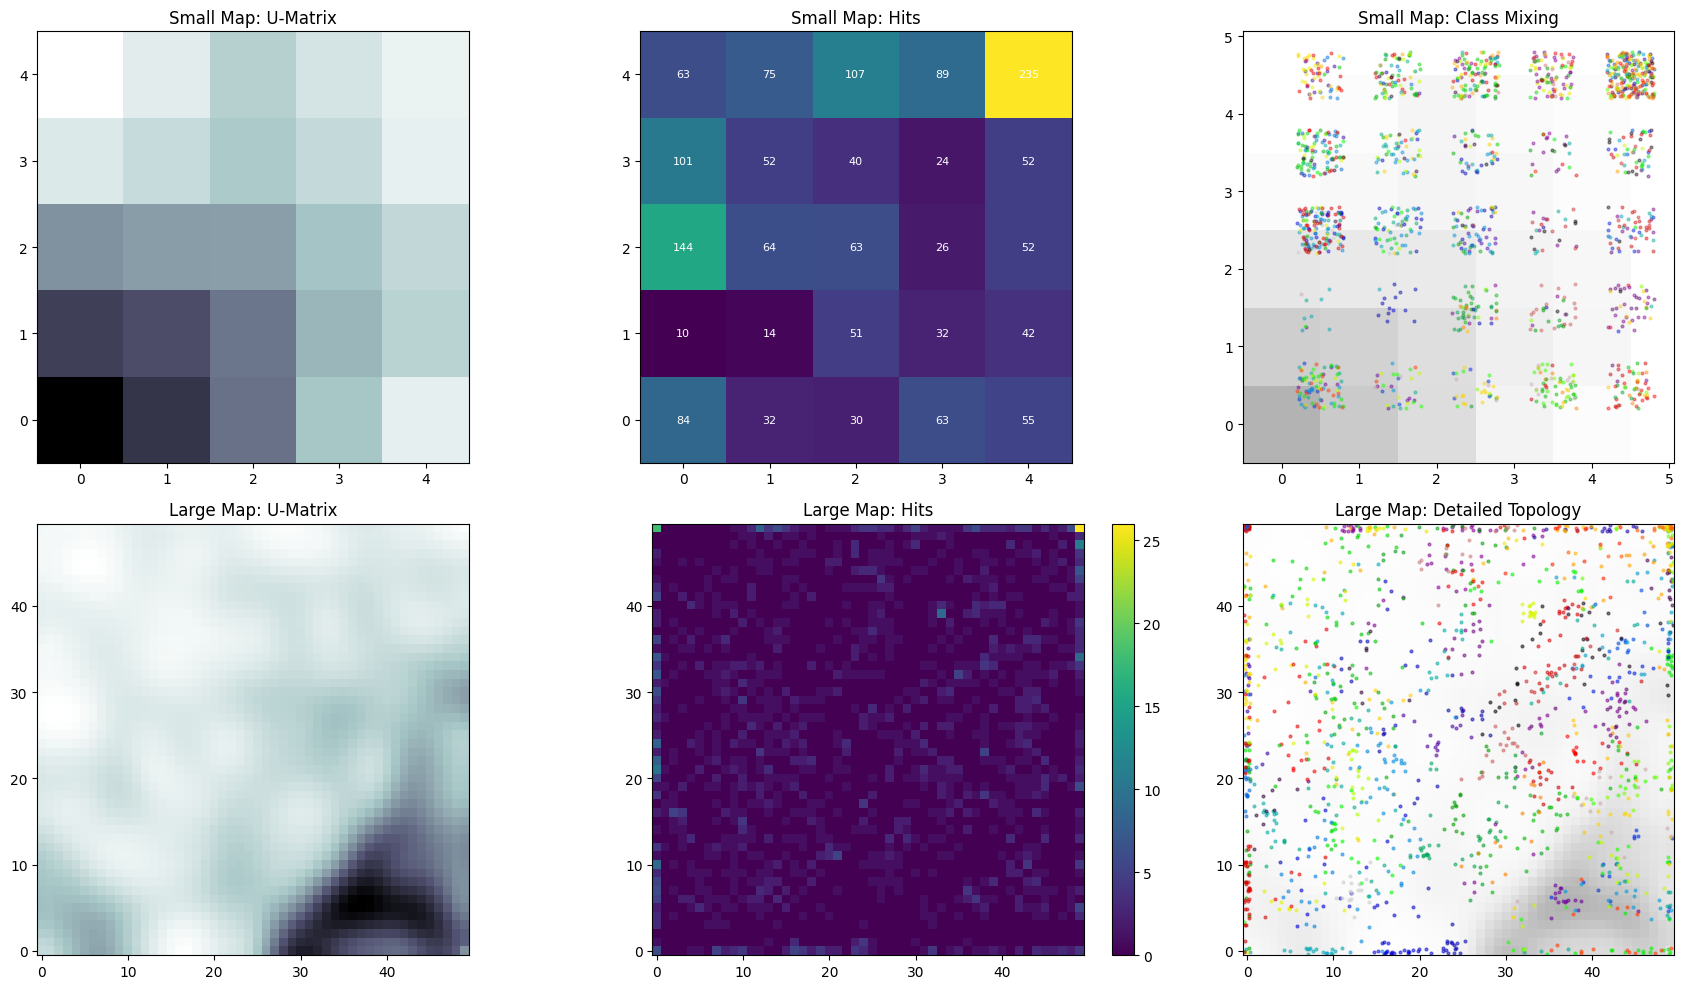


=== Granularity & Magnification Analysis ===
Small Map Empty Neurons: 0/25 (0.0%)
Large Map Empty Neurons: 1545/2500 (61.8%)


In [11]:
# Task 3 — Compare very small vs very large SOM (MiniSom)

# A. Very Small Map (5x5)
small_dim = 5
small_sigma = 2.5

# B. Very Large Map (50x50)
large_dim = 50
large_sigma = 12.0

# C. "High" parameters
high_lr = 0.8
iterations_task3 = 8000

print(f"1. Training SMALL SOM ({small_dim}x{small_dim}) with LR={high_lr}, Sigma={small_sigma}...")
som_small = train_som(
    X_scaled, small_dim, small_dim,
    sigma=small_sigma, learning_rate=high_lr,
    iterations=iterations_task3, random_seed=42,
    use_pca_init=True, verbose=False
)

print(f"2. Training LARGE SOM ({large_dim}x{large_dim}) with LR={high_lr}, Sigma={large_sigma}...")
som_large = train_som(
    X_scaled, large_dim, large_dim,
    sigma=large_sigma, learning_rate=high_lr,
    iterations=iterations_task3, random_seed=42,
    use_pca_init=True, verbose=False
)

qe_small = som_small.quantization_error(X_scaled)
te_small = som_small.topographic_error(X_scaled)

qe_large = som_large.quantization_error(X_scaled)
te_large = som_large.topographic_error(X_scaled)

print("\n=== Comparative Metrics ===")
print(f"Small Map ({small_dim}x{small_dim})   | QE: {qe_small:.4f} | TE: {te_small:.4f}")
print("-" * 60)
print(f"Large Map ({large_dim}x{large_dim}) | QE: {qe_large:.4f} | TE: {te_large:.4f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# --- Row 1: Small Map ---
u_small = som_small.distance_map(scaling="mean")
axes[0, 0].imshow(u_small.T, origin="lower", cmap="bone_r")
axes[0, 0].set_title("Small Map: U-Matrix")

h_small = som_small.activation_response(X_scaled)
axes[0, 1].imshow(h_small.T, origin="lower", cmap="viridis")
for i in range(small_dim):
    for j in range(small_dim):
        axes[0, 1].text(i, j, int(h_small[i, j]), ha="center", va="center", color="white", fontsize=8)
axes[0, 1].set_title("Small Map: Hits")

axes[0, 2].imshow(u_small.T, origin="lower", cmap="Greys", alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_small.winner(x)
    jitter = np.random.rand(2) * 0.6 - 0.3
    c_idx = (int(y[i]) - 1) % len(colors)
    c = colors[c_idx]
    axes[0, 2].plot(w[0] + 0.5 + jitter[0], w[1] + 0.5 + jitter[1],
                    marker="o", markersize=2, color=c, alpha=0.4)
axes[0, 2].set_title("Small Map: Class Mixing")

# --- Row 2: Large Map ---
u_large = som_large.distance_map(scaling="mean")
axes[1, 0].imshow(u_large.T, origin="lower", cmap="bone_r")
axes[1, 0].set_title("Large Map: U-Matrix")

h_large = som_large.activation_response(X_scaled)
im_large = axes[1, 1].imshow(h_large.T, origin="lower", cmap="viridis")
axes[1, 1].set_title("Large Map: Hits")
plt.colorbar(im_large, ax=axes[1, 1], fraction=0.046)

axes[1, 2].imshow(u_large.T, origin="lower", cmap="Greys", alpha=0.3)
for i, x in enumerate(X_scaled):
    w = som_large.winner(x)
    jitter = np.random.rand(2) * 0.7 - 0.35
    c_idx = (int(y[i]) - 1) % len(colors)
    c = colors[c_idx]
    axes[1, 2].plot(w[0] + jitter[0], w[1] + jitter[1],
                    marker="o", markersize=2, color=c, alpha=0.5)
axes[1, 2].set_title("Large Map: Detailed Topology")

plt.tight_layout()
plt.show()

empty_nodes_small = int(np.sum(h_small == 0))
empty_nodes_large = int(np.sum(h_large == 0))

print("\n=== Granularity & Magnification Analysis ===")
print(f"Small Map Empty Neurons: {empty_nodes_small}/{small_dim*small_dim} ({(empty_nodes_small/(small_dim*small_dim))*100:.1f}%)")
print(f"Large Map Empty Neurons: {empty_nodes_large}/{large_dim*large_dim} ({(empty_nodes_large/(large_dim*large_dim))*100:.1f}%)")

# Task 4 Analyze different initial neighborhood radius settings:
- [ ] Train the very large SOM as specified above, but with a much too small neighborhood radius.
- [ ] Analyse the 
  - [ ] a) cluster structure, 
  - [ ] b) quantization errors, 
  - [ ] c) topology violations. 
  - [ ] d) In how far does this map differ from the very large map trained with a correct/high initial neighborhood radius?
- [ ] Describe and compare the structures found (what is the effect of a „too small“ neighborhood radius? How to detect it?)



Training 'Bad Sigma' SOM (50x50) with LR=0.8, Sigma=0.5...

=== Comparative Metrics: Neighborhood Radius Effect ===
Map Type             | Quantization Error (QE)   | Topographic Error (TE)   
---------------------------------------------------------------------------
Good Radius (12.0)   | 0.2249                    | 0.0081                   
Small Radius (0.5)   | 0.2413                    | 0.7913                   


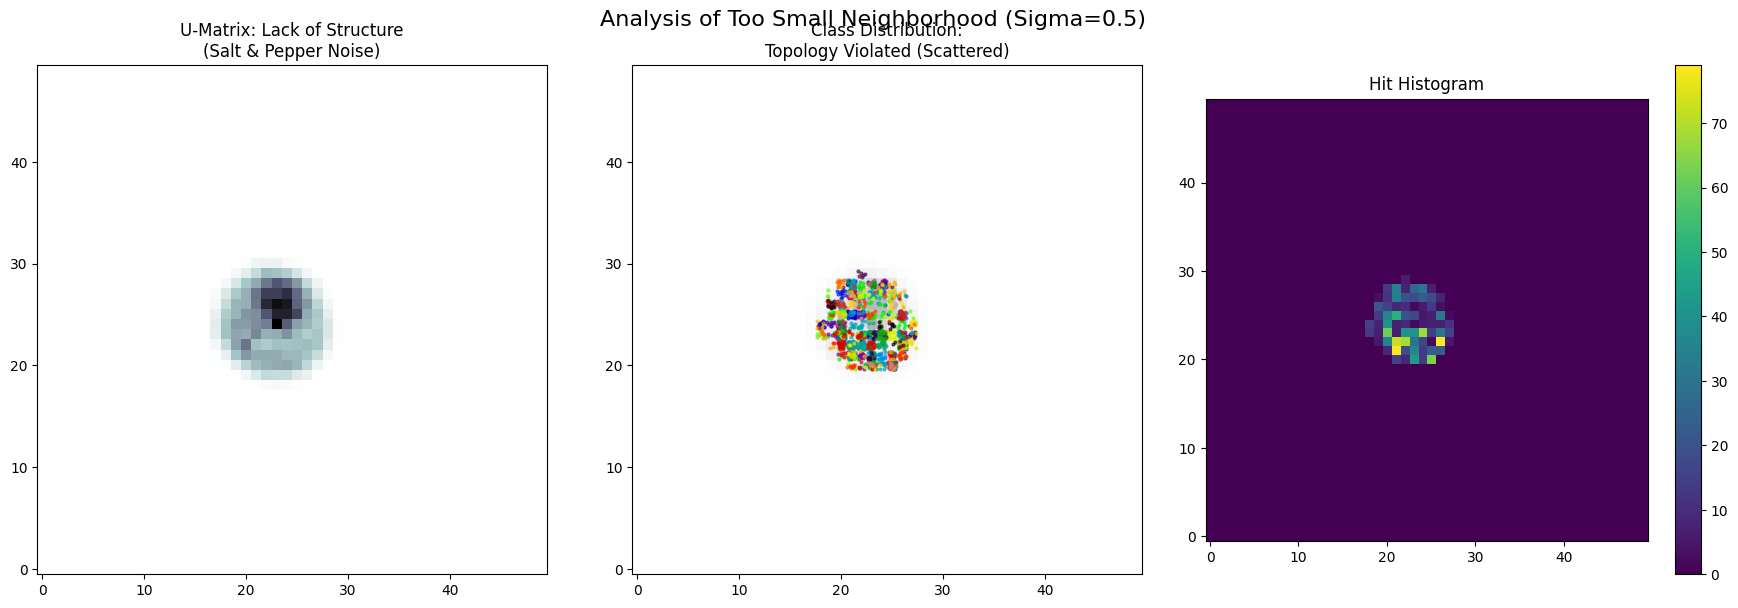


=== Analysis Findings ===
a) Cluster Structure:
   - U-Matrix looks like noise. No smooth valleys/ridges.
   - Reason: with too-small sigma, neighbors do not co-adapt -> no global ordering.

b) Quantization Error (QE):
   - QE is 0.2413 (can be deceptively low because the map behaves like a vector quantizer).

c) Topology Violations (TE):
   - TE is 0.7913 (high TE is the signature of a disordered / twisted map).


In [12]:

# Task 4 — Broken map with too-small neighborhood (MiniSom)

bad_sigma = 0.5
large_dim = 50
high_lr = 0.8
iterations_task4 = 8000

print(f"Training 'Bad Sigma' SOM ({large_dim}x{large_dim}) with LR={high_lr}, Sigma={bad_sigma}...")
som_bad = train_som(
    X_scaled, large_dim, large_dim,
    sigma=bad_sigma, learning_rate=high_lr,
    iterations=iterations_task4, random_seed=42,
    use_pca_init=True, verbose=False
)

qe_bad = som_bad.quantization_error(X_scaled)
te_bad = som_bad.topographic_error(X_scaled)

# Retrieve Good Map metrics (from Task 3) if available
try:
    qe_good = som_large.quantization_error(X_scaled)
    te_good = som_large.topographic_error(X_scaled)
except NameError:
    qe_good, te_good = float("nan"), float("nan")

print("\n=== Comparative Metrics: Neighborhood Radius Effect ===")
print(f"{'Map Type':<20} | {'Quantization Error (QE)':<25} | {'Topographic Error (TE)':<25}")
print("-" * 75)
print(f"{'Good Radius (12.0)':<20} | {qe_good:<25.4f} | {te_good:<25.4f}")
print(f"{'Small Radius (0.5)':<20} | {qe_bad:<25.4f} | {te_bad:<25.4f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Analysis of Too Small Neighborhood (Sigma={bad_sigma})", fontsize=16)

u_bad = som_bad.distance_map(scaling="mean")
axes[0].imshow(u_bad.T, origin="lower", cmap="bone_r")
axes[0].set_title("U-Matrix: Lack of Structure\n(Salt & Pepper Noise)")

axes[1].imshow(u_bad.T, origin="lower", cmap="Greys", alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_bad.winner(x)
    c_idx = (int(y[i]) - 1) % len(colors)
    c = colors[c_idx]
    axes[1].plot(w[0] + np.random.rand() * 0.8 - 0.4,
                 w[1] + np.random.rand() * 0.8 - 0.4,
                 marker="o", markersize=2, color=c, alpha=0.6)
axes[1].set_title("Class Distribution:\nTopology Violated (Scattered)")

h_bad = som_bad.activation_response(X_scaled)
im3 = axes[2].imshow(h_bad.T, origin="lower", cmap="viridis")
axes[2].set_title("Hit Histogram")
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

print("\n=== Analysis Findings ===")
print("a) Cluster Structure:")
print("   - U-Matrix looks like noise. No smooth valleys/ridges.")
print("   - Reason: with too-small sigma, neighbors do not co-adapt -> no global ordering.")

print("\nb) Quantization Error (QE):")
print(f"   - QE is {qe_bad:.4f} (can be deceptively low because the map behaves like a vector quantizer).")

print("\nc) Topology Violations (TE):")
print(f"   - TE is {te_bad:.4f} (high TE is the signature of a disordered / twisted map).")

# Task 5 Analyze different initial learning rates:
- [ ] Train the regular-sized SOM as specified above, but with a (I) much too large / (II) much too small learning rate (provide justification for the setting of the parameter)
- [ ] Analyse for both (I) and (II) 
  - [ ] a) cluster structure, 
  - [ ] b) quantization errors, 
  - [ ] c) topology violations.
  - [ ] d) In how far do these two maps differ from the well-trained map analyzed above?
- [ ] Describe and compare the structures found (how can you detect „too small“ learning rates? When do they start to make sense?

1. Training SOM with TOO LARGE Rate (LR=2.5)...
2. Training SOM with TOO SMALL Rate (LR=0.01)...

=== Comparative Metrics: Learning Rate Effect ===
Configuration             | Quantization Error (QE)   | Topographic Error (TE)   
--------------------------------------------------------------------------------
Baseline (LR=0.5)         | 0.3226                    | 0.0037                   
Too Large (LR=2.5)        | 0.2769                    | 0.0731                   
Too Small (LR=0.01)       | 0.2909                    | 0.0338                   


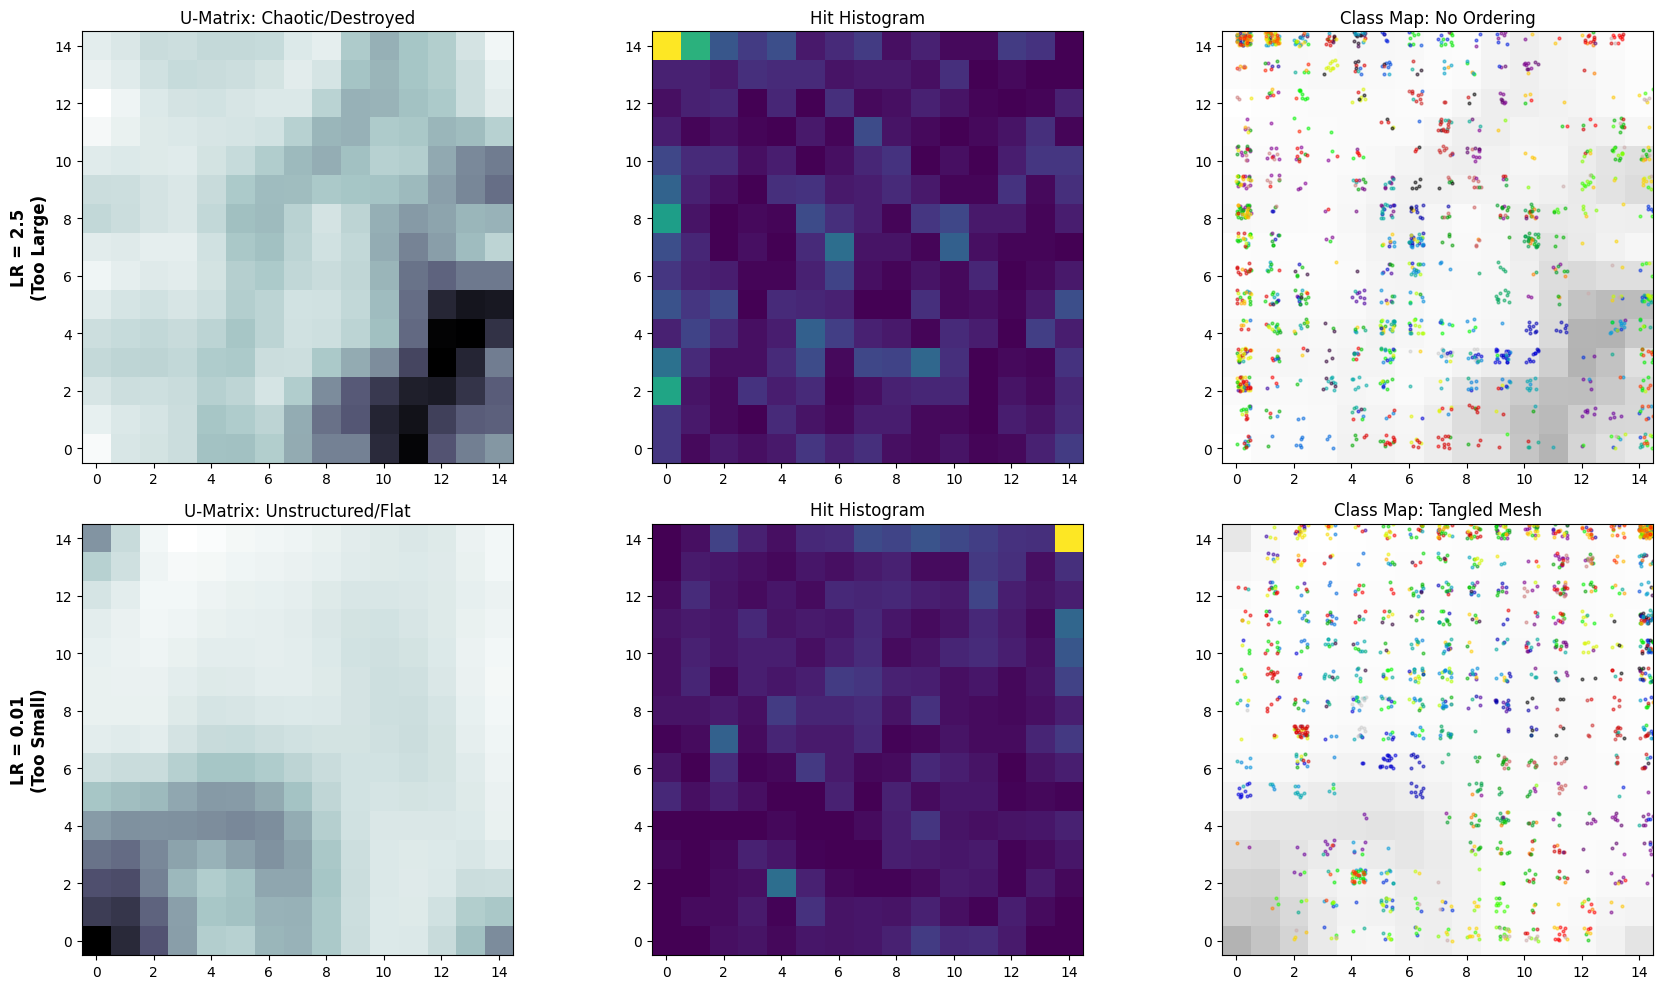

In [13]:
# Task 5 — Learning rate extremes (MiniSom)

map_dim = 15
sigma_task5 = 4.0
iterations_task5 = 8000

lr_too_large = 2.5
lr_too_small = 0.01

print(f"1. Training SOM with TOO LARGE Rate (LR={lr_too_large})...")
som_large_lr = train_som(
    X_scaled, map_dim, map_dim,
    sigma=sigma_task5, learning_rate=lr_too_large,
    iterations=iterations_task5, random_seed=42,
    use_pca_init=True, verbose=False
)

print(f"2. Training SOM with TOO SMALL Rate (LR={lr_too_small})...")
som_small_lr = train_som(
    X_scaled, map_dim, map_dim,
    sigma=sigma_task5, learning_rate=lr_too_small,
    iterations=iterations_task5, random_seed=42,
    use_pca_init=True, verbose=False
)

def safe_metrics(som_instance: som_module.MiniSom, data: np.ndarray):
    try:
        return som_instance.quantization_error(data), som_instance.topographic_error(data)
    except Exception:
        return float("inf"), float("inf")

qe_large_lr, te_large_lr = safe_metrics(som_large_lr, X_scaled)
qe_small_lr, te_small_lr = safe_metrics(som_small_lr, X_scaled)

# Baseline from Task 1 (if available)
try:
    qe_base = som_net.quantization_error(X_scaled)
    te_base = som_net.topographic_error(X_scaled)
except NameError:
    qe_base, te_base = float("nan"), float("nan")

print("\n=== Comparative Metrics: Learning Rate Effect ===")
print(f"{'Configuration':<25} | {'Quantization Error (QE)':<25} | {'Topographic Error (TE)':<25}")
print("-" * 80)
print(f"{'Baseline (LR=0.5)':<25} | {qe_base:<25.4f} | {te_base:<25.4f}")
print(f"{'Too Large (LR=2.5)':<25} | {qe_large_lr:<25.4f} | {te_large_lr:<25.4f}")
print(f"{'Too Small (LR=0.01)':<25} | {qe_small_lr:<25.4f} | {te_small_lr:<25.4f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Row 1: Too Large LR
axes[0, 0].set_ylabel(f"LR = {lr_too_large}\n(Too Large)", fontsize=12, fontweight="bold")
u_large = som_large_lr.distance_map(scaling="mean")
axes[0, 0].imshow(u_large.T, origin="lower", cmap="bone_r")
axes[0, 0].set_title("U-Matrix: Chaotic/Destroyed")

h_large = som_large_lr.activation_response(X_scaled)
axes[0, 1].imshow(h_large.T, origin="lower", cmap="viridis")
axes[0, 1].set_title("Hit Histogram")

axes[0, 2].imshow(u_large.T, origin="lower", cmap="Greys", alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_large_lr.winner(x)
    c_idx = (int(y[i]) - 1) % len(colors)
    c = colors[c_idx]
    axes[0, 2].plot(w[0] + np.random.rand() * 0.5, w[1] + np.random.rand() * 0.5,
                    marker="o", markersize=2, color=c, alpha=0.5)
axes[0, 2].set_title("Class Map: No Ordering")

# Row 2: Too Small LR
axes[1, 0].set_ylabel(f"LR = {lr_too_small}\n(Too Small)", fontsize=12, fontweight="bold")
u_small = som_small_lr.distance_map(scaling="mean")
axes[1, 0].imshow(u_small.T, origin="lower", cmap="bone_r")
axes[1, 0].set_title("U-Matrix: Unstructured/Flat")

h_small = som_small_lr.activation_response(X_scaled)
axes[1, 1].imshow(h_small.T, origin="lower", cmap="viridis")
axes[1, 1].set_title("Hit Histogram")

axes[1, 2].imshow(u_small.T, origin="lower", cmap="Greys", alpha=0.3)
for i, x in enumerate(X_scaled):
    w = som_small_lr.winner(x)
    c_idx = (int(y[i]) - 1) % len(colors)
    c = colors[c_idx]
    axes[1, 2].plot(w[0] + np.random.rand() * 0.5, w[1] + np.random.rand() * 0.5,
                    marker="o", markersize=2, color=c, alpha=0.5)
axes[1, 2].set_title("Class Map: Tangled Mesh")

plt.tight_layout()
plt.show()

# Task 6 Analyze different max iterations:
- [ ] Train a regular SOM using 2, 5, 10, 50, 100, 1000, 5000, 10000 iterations
- [ ] Analyse cluster structure. 
  - [ ] a) When do cluster structures start to emerge? 
  - [ ] b) After how many iterations do they stabilize? 
  - [ ] c) How can you tell from the quality measures whether the map is stable? 
  - [ ] d) Which visualizations help you discover not-yet stable SOM mappings?
- [ ] Describe and compare the structures found (what is the effect of a „too low“ number of iterations, when does it start to converge properly/lead to reasonable structures?)

/var/folders/dd/s_bsbwtx0cs_9c2lr_ldkfbc0000gn/T/ipykernel_59711/435867558.py:13: UserWarning: Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.
  pn.extension('bokeh')


1. Generating Component Planes...


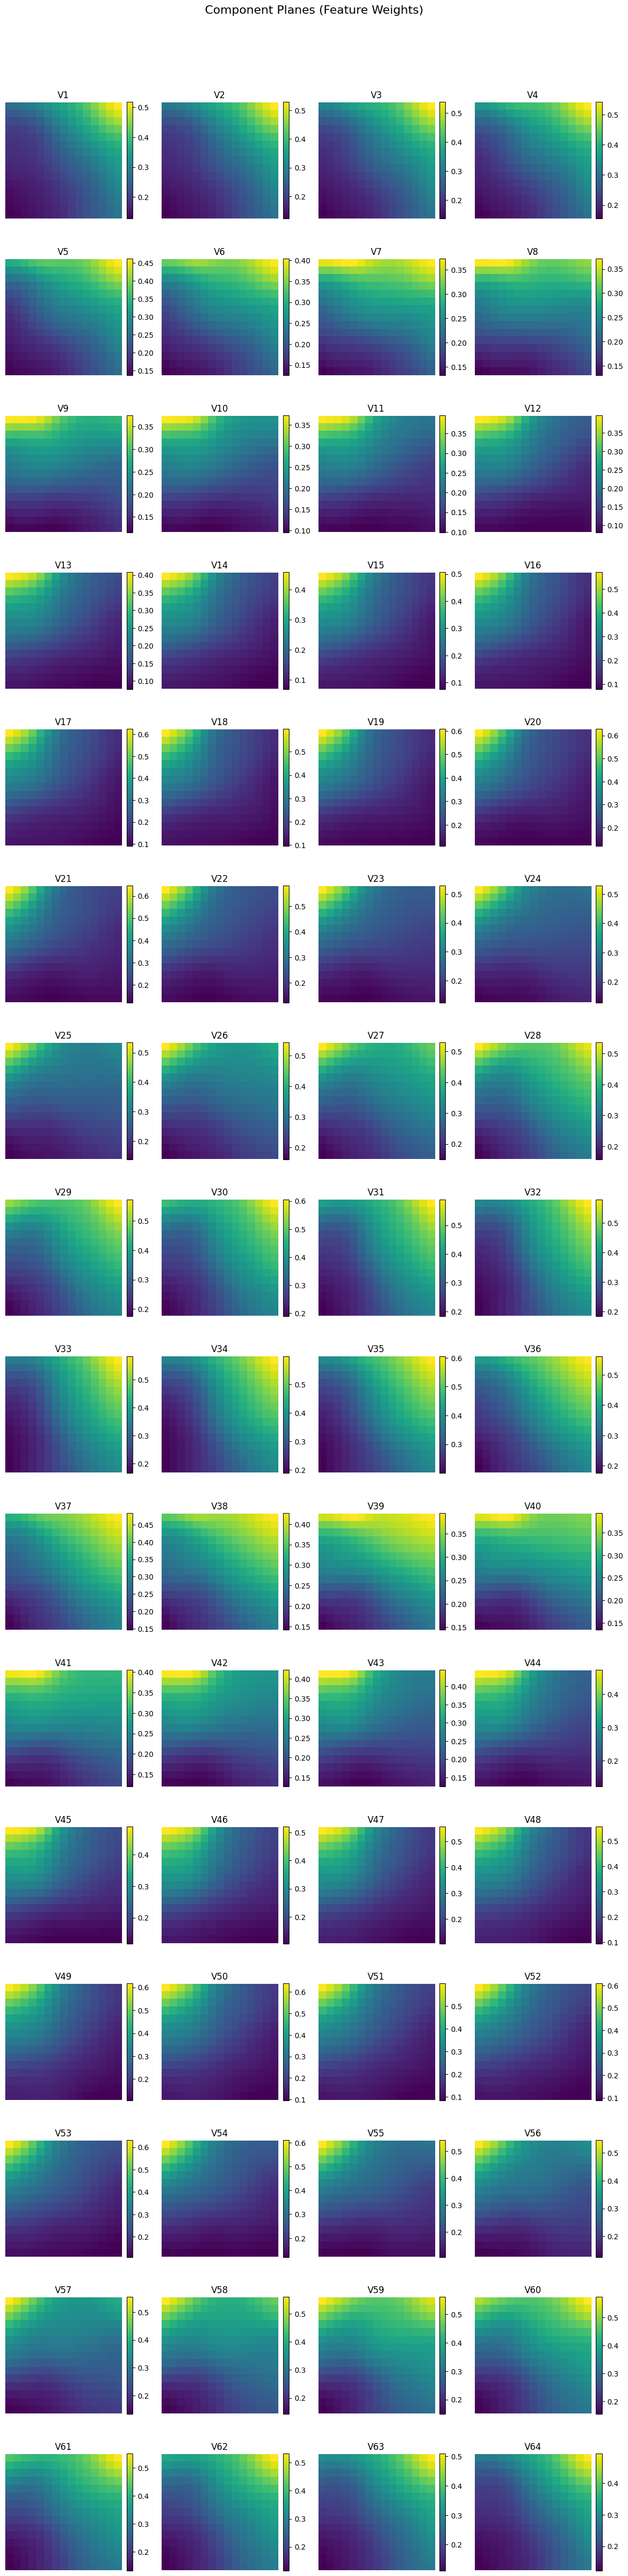


2. Testing SOMToolBox_Parse integration...
   [OK] Successfully read 'som_weights_check.wgt'.
   Metadata: XDIM=15, YDIM=15, VEC_DIM=64

3. Initializing Interactive SOMToolbox Dashboard...
   [Skipped] Dashboard initialization failed: cannot reshape array of size 15 into shape (15,15)
   (Note: This requires panel, holoviews, and the 'visualizations' subpackage to be present)


In [16]:
# Task 6: Advanced Visualization & Toolbox Integration
# 1. Component Planes (Static)
# 2. SOMToolBox_Parse Integration (IO Check)
# 3. Interactive Dashboard (SOMToolbox)

import matplotlib.pyplot as plt
import math
import panel as pn
import holoviews as hv

# Initialize Panel extension for the interactive dashboard
try:
    pn.extension('bokeh')
except Exception:
    pass

# --- Part A: Static Component Planes (Matplotlib) ---
# Visualizes the weight distribution of each feature.
# High values (yellow) indicate neurons that react strongly to that feature.

def plot_component_planes(som_instance, feature_names=None):
    weights = som_instance.get_weights()
    map_x, map_y, n_features = weights.shape
    
    # Calculate grid layout
    n_cols = 4
    n_rows = math.ceil(n_features / n_cols)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*3, n_rows*3))
    axes = axes.flatten()
    
    for i in range(n_features):
        plane = weights[:, :, i]
        # Use origin='lower' to match U-Matrix orientation
        im = axes[i].imshow(plane.T, origin='lower', cmap='viridis')
        title = feature_names[i] if feature_names else f"Feat {i}"
        axes[i].set_title(title)
        axes[i].axis('off')
        fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)
        
    # Hide unused subplots
    for i in range(n_features, len(axes)):
        axes[i].axis('off')
        
    plt.suptitle("Component Planes (Feature Weights)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

if 'som_net' in locals() and not df.empty:
    print("1. Generating Component Planes...")
    # Get feature names from dataframe if available
    if 'Class' in df.columns:
        feat_names = df.drop(columns=['Class']).columns.tolist()
    else:
        feat_names = df.columns.tolist()
        
    plot_component_planes(som_net, feat_names)


# --- Part B: Integration with SOMToolBox_Parse.py ---
# Uses the provided parser class to verify weight file compatibility.

if 'som_net' in locals():
    print("\n2. Testing SOMToolBox_Parse integration...")
    try:
        # Define a temporary filename
        wgt_filename = "som_weights_check.wgt"
        
        # 1. Export using our helper (defined in Cell 4)
        export_somtoolbox_weights(som_net, wgt_filename)
        
        # 2. Import using the provided SOMToolBox_Parse class
        # Ensure class is imported
        if 'SOMToolBox_Parse' not in locals():
            from SOMToolbox.SOMToolBox_Parse import SOMToolBox_Parse
            
        parser = SOMToolBox_Parse(wgt_filename)
        parsed_data = parser.read_weight_file()
        
        print(f"   [OK] Successfully read '{wgt_filename}'.")
        print(f"   Metadata: XDIM={parsed_data['xdim']}, YDIM={parsed_data['ydim']}, VEC_DIM={parsed_data['vec_dim']}")
        
    except Exception as e:
        print(f"   [Error] Parser integration failed: {e}")


# --- Part C: Interactive Dashboard (somtoolbox.py) ---
# Uses the provided SOMToolbox class to launch an interactive view.

print("\n3. Initializing Interactive SOMToolbox Dashboard...")

if 'som_net' in locals():
    try:
        # Import the class (handle potential path issues)
        if 'SOMToolbox' not in locals():
            try:
                from SOMToolbox.somtoolbox import SOMToolbox
            except ImportError:
                from somtoolbox import SOMToolbox

        # Prepare arguments
        weights = som_net.get_weights()
        m_dim, n_dim, vec_dim = weights.shape
        
        # Ensure classes are integers for the toolbox colors
        try:
            classes_int = y.astype(int)
        except:
            classes_int = pd.factorize(y)[0]

        # Instantiate the toolbox
        # This creates the visualizations (U-Matrix, HitHist, Component Planes, etc.)
        sm_dashboard = SOMToolbox(
            m=m_dim,
            n=n_dim,
            dimension=vec_dim,
            weights=weights,
            input_data=X_scaled,
            classes=classes_int,
            component_names=feat_names
        )
        
        print("   Dashboard initialized. Displaying below:")
        # Render the main view
        display(sm_dashboard._mainview)

    except NameError:
        print("   [Skipped] 'SOMToolbox' class not found. Check imports in Cell 1.")
    except Exception as e:
        print(f"   [Skipped] Dashboard initialization failed: {e}")
        print("   (Note: This requires panel, holoviews, and the 'visualizations' subpackage to be present)")

# Task 7 Detailed analysis of an „Optimal SOM“
- [ ] Train a SOM using what you consider to be „optimal parameters“ based on sub-tasks 1
- [ ] Describe the final model following MLSO.
- [ ] Provide a detailed interpretation of the cluster/class structures using a combination of visualizations and their parameter settings. Describe the findings in detail, specifically analyzing and providing rationale for
  - [ ] a. Cluster densities / cardinalities, shapes: what can you tell about the cluster sizes shapes, their cardinalities and densities? Can you observe areas of higher/lower densities? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] b. Hierarchical cluster relationships: can you detect any hierarchies in the data? How do they seem to be structured? Which clusters are similar, which are very distant, how could they be related? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] c. Topological relations / violations: in which areas can you observe topology violations? What types of violations do you observe in which areas of the map (i.e. actual violations due to bad training or the inherent structure of the data vs. cluster data that is mapped onto the plane). In how far do different visualizations agree on these violations? Compare different visualizations that support (or contradict) your hypothesis and reason/explain why they do so.
  - [ ] d. Class distribution: Which classes are mapped onto which parts of the map? How do they relate to each other? In how far does the class distribution match the cluster structure? Which classes are well-separated, which ones less so? What might be the reason for these overlaps? Is the mapping less correct in these regions (e.g. higher error measures)? Are these areas well-separated. Which classes form homogeneous clusters, which form sub-clusters, how similar are these sub-clusters?
  - [ ] e. Quality of the map in terms of vector quantization and topology violation: is the quality homogeneous, are there certain areas or classes where the quality of the mapping is lower, others where it is higher?

Training OPTIMAL SOM (20x20)...
 [ 20000 / 20000 ] 100% - 0:00:00 left 
 quantization error: 0.23687890140962964

=== Final Model Metrics ===
Quantization Error (QE): 0.2369
Topographic Error  (TE): 0.0088


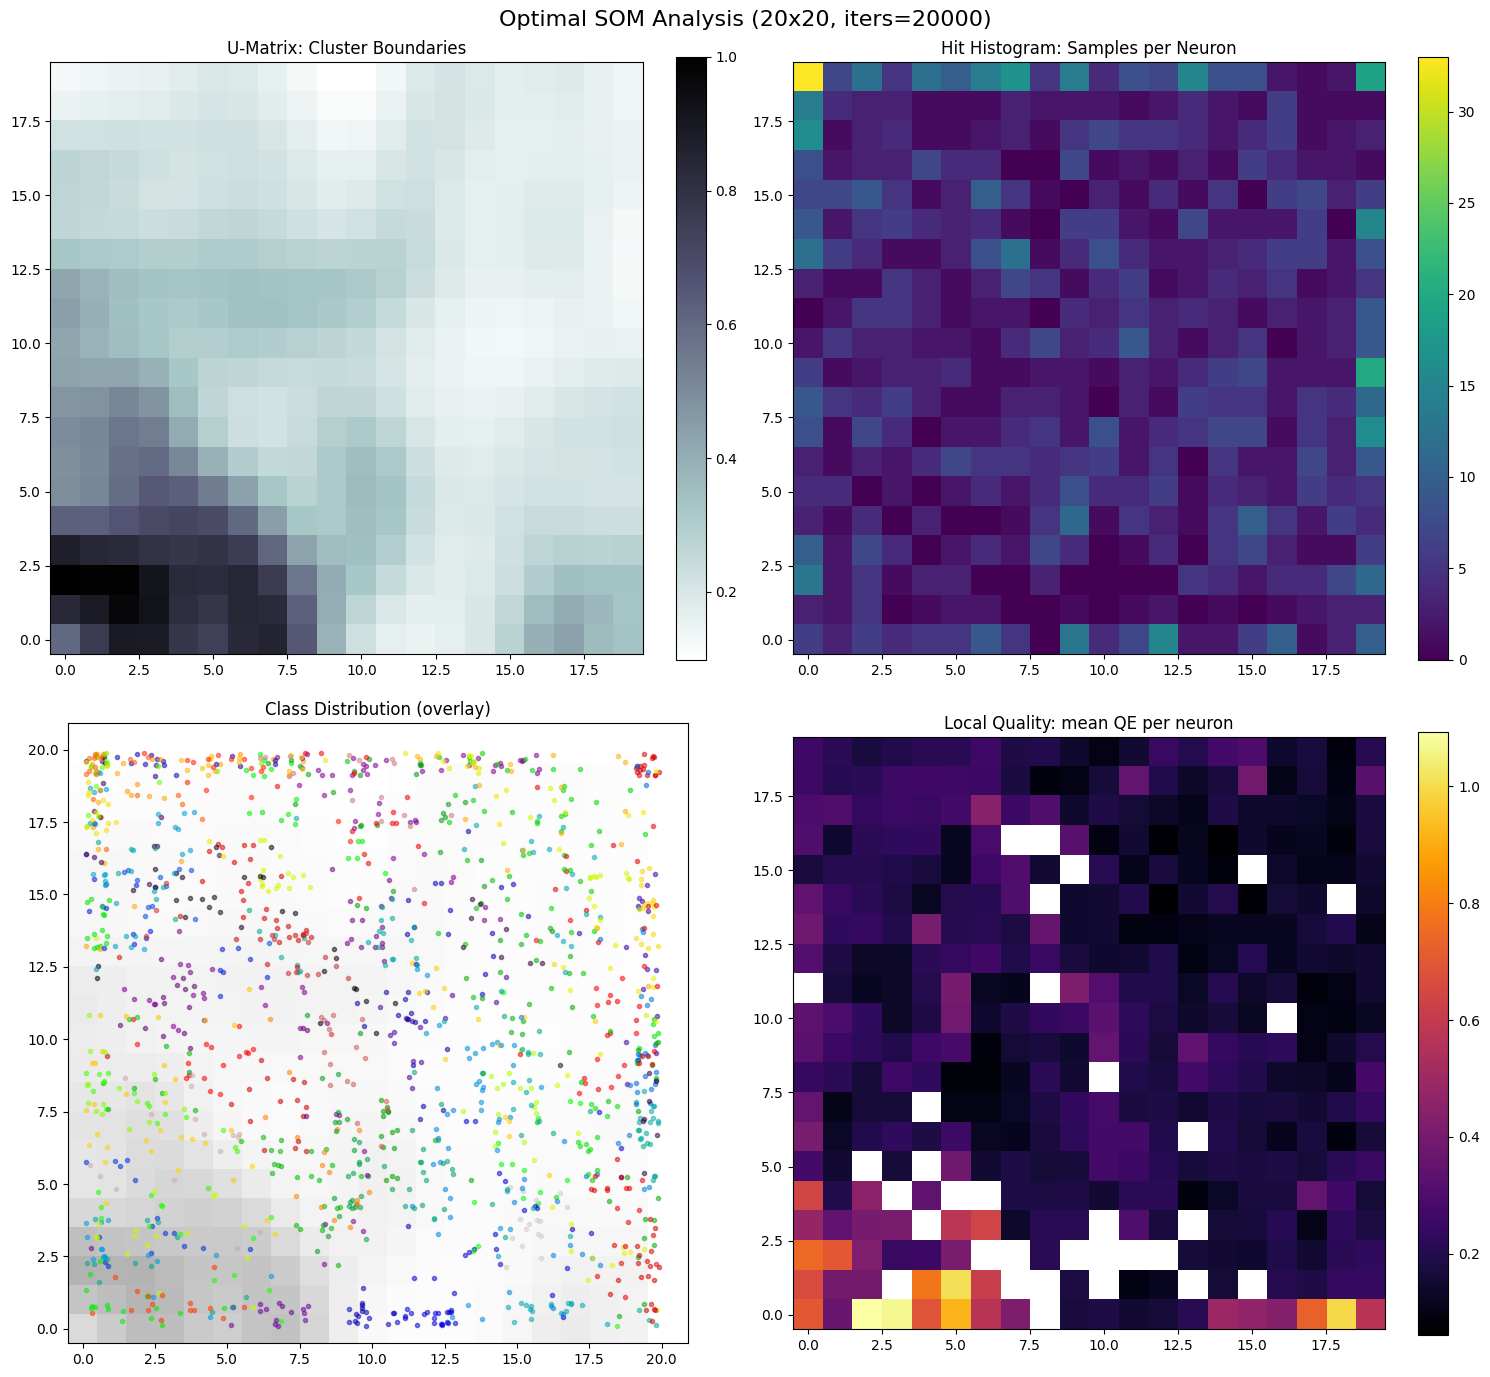

In [20]:
# Task 7 — "Optimal" configuration + advanced visualizations (MiniSom)

opt_dim = 20
opt_sigma = 5.0
opt_lr = 0.5
opt_iters = 20000

print(f"Training OPTIMAL SOM ({opt_dim}x{opt_dim})...")
som_opt = train_som(
    X_scaled, opt_dim, opt_dim,
    sigma=opt_sigma, learning_rate=opt_lr,
    iterations=opt_iters, random_seed=42,
    use_pca_init=True, verbose=True
)

qe_opt = som_opt.quantization_error(X_scaled)
te_opt = som_opt.topographic_error(X_scaled)

print("\n=== Final Model Metrics ===")
print(f"Quantization Error (QE): {qe_opt:.4f}")
print(f"Topographic Error  (TE): {te_opt:.4f}")

# Maps needed for detailed analysis
u_opt = som_opt.distance_map(scaling="mean")
qe_map, hits_map = qe_map_and_hits(som_opt, X_scaled)

fig, axes = plt.subplots(2, 2, figsize=(15, 14))
fig.suptitle(f"Optimal SOM Analysis ({opt_dim}x{opt_dim}, iters={opt_iters})", fontsize=16)

# A. U-Matrix
im1 = axes[0, 0].imshow(u_opt.T, origin="lower", cmap="bone_r")
axes[0, 0].set_title("U-Matrix: Cluster Boundaries")
plt.colorbar(im1, ax=axes[0, 0], fraction=0.046)

# B. Hit Histogram
im2 = axes[0, 1].imshow(hits_map.T, origin="lower", cmap="viridis")
axes[0, 1].set_title("Hit Histogram: Samples per Neuron")
plt.colorbar(im2, ax=axes[0, 1], fraction=0.046)

# C. Class Distribution
axes[1, 0].imshow(u_opt.T, origin="lower", cmap="Greys", alpha=0.3)
colors = plt.cm.nipy_spectral(np.linspace(0, 1, 100))
for i, x in enumerate(X_scaled):
    w = som_opt.winner(x)
    c = colors[int(y[i]) - 1] if int(y[i]) <= 100 else colors[99]
    j1 = np.random.rand() * 0.8 - 0.4
    j2 = np.random.rand() * 0.8 - 0.4
    axes[1, 0].plot(w[0] + 0.5 + j1, w[1] + 0.5 + j2, marker="o", markersize=3, color=c, alpha=0.5)
axes[1, 0].set_title("Class Distribution (overlay)")

# D. Local Quality (QE Map)
im4 = axes[1, 1].imshow(qe_map.T, origin="lower", cmap="inferno")
axes[1, 1].set_title("Local Quality: mean QE per neuron")
plt.colorbar(im4, ax=axes[1, 1], fraction=0.046)

plt.tight_layout()
plt.show()